In [123]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import LogisticRegression
os.chdir('C:/Users/Show/Desktop/credit')
%matplotlib inline

In [124]:
df = pd.read_csv('creditcard.csv') #loading data

In [125]:
df.head() # check the data frame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [126]:
df.shape #check rows and columns

(284807, 31)

In [127]:
df.describe() # data summary every column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [128]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [129]:
df.isnull().sum() # no missing value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [130]:
df['Amount'].describe() #Focus on Amount summarize

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [131]:
df['Amount'].var() #Variance in Amount

62560.069046340635

In [132]:
df['Amount'].std() #Standard Deviatiion in Amount

250.1201092402221

In [133]:
 del df['Time'] # Since we have the goal to estimate the credit card in investment bank, the time is not significant, so remove time.

In [134]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

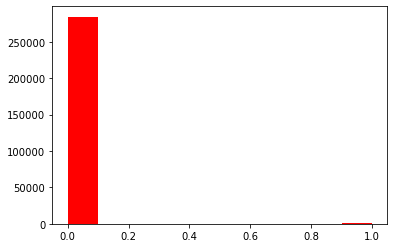

In [135]:
plt.hist(df.Class,color='red') # graph see the class of credit card as binary values

In [136]:
X= pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1]) # set up X-column without class in data frame, y-column only includes class

In [137]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

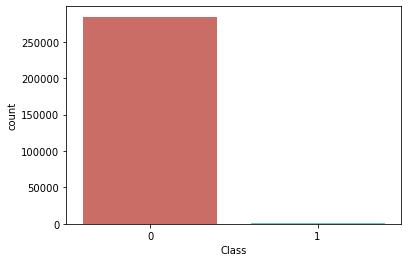

In [138]:
import seaborn as sns
sns.countplot(x='Class',data=df,palette='hls')
plt.show()

In [139]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [140]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [141]:
X_train,X_test,y_train,y_test = train_test_split (
        X,y,test_size = 0.2,
    random_state = 0)  #split values into machine learning by 80/20 law

In [142]:
X_train.shape

(227845, 29)

In [143]:
X_test.shape

(56962, 29)

In [144]:
logistic = LogisticRegression() #set up logistic model

In [145]:
logistic.fit(X_train,y_train) # import the train data into logistic model

C:\Users\Show\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Show\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
print(logistic.coef_)  #see the relationship between the different columns. the logistic regression is logis(Class~.,family=binomial)

[[-0.0239994  -0.32601195  0.05196431  0.41643979 -0.4507825   0.24273173
   0.46785101 -0.22952857 -0.40115545 -0.60630716  0.06064716 -0.22393034
  -0.29446386 -0.67368498 -0.20473664 -0.44813622  0.02908516  0.22986704
  -0.21713369  1.38292953  0.7151628   0.18901908 -0.34411612 -0.05290326
  -0.17021798 -0.00243072 -0.28976467  0.0276186  -0.00701583]]


In [147]:
print(logistic.intercept_) # see the intercept is -7.71

[-7.70591906]


In [148]:
y_pred = logistic.predict(X_test) #using the train model, but predict on test data

In [149]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix) #build up matrix table

[[56851    10]
 [   38    63]]


In [150]:
logistic.score(X_test,y_test) #Accuracy is 99%

0.9991573329588147

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #both way is 99%

0.9991573329588147

In [152]:
y_pred_train = logistic.predict(X_train)

In [153]:
accuracy_score(y_train,y_pred_train) # what accuracy test on test data, also similar outcome in train data

0.9992012113498212

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
fpr,tpr,thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])

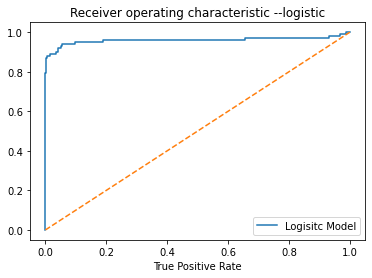

In [155]:
plt.figure()
plt.plot(fpr,tpr, label = 'Logisitc Model' % roc)
plt.plot([0,1],ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver operating characteristic --logistic')
plt.legend()
plt.show()  #Roc graph

In [156]:
print('Roc_Auc_Score for Logistic',roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1]))

Roc_Auc_Score for Logistic 0.9595403834363492


In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [158]:
data_tree = DecisionTreeClassifier()
data_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [159]:
data_tree.score(X_test,y_test)

0.9992802219023208

In [160]:
data_tree.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
data_tree.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [162]:
new_y = []
for i in range(len(tree_pred)):
    if tree_pred[i] < 0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [163]:
accuracy_score(y_test,new_y)

0.9992451107756047

In [164]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    data_tree = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    data_tree.fit(X_train,y_train)
    train_accuracy.append(data_tree.score(X_train,y_train))
    test_accuracy.append(data_tree.score(X_test,y_test))

In [165]:
tree_frame = pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
tree_frame.head()

,max_depth,train_acc,test_acc
0,1,0.999100,0.999017
1,2,0.999307,0.999245
2,3,0.999337,0.999228
3,4,0.999508,0.999421
4,5,0.999623,0.999403


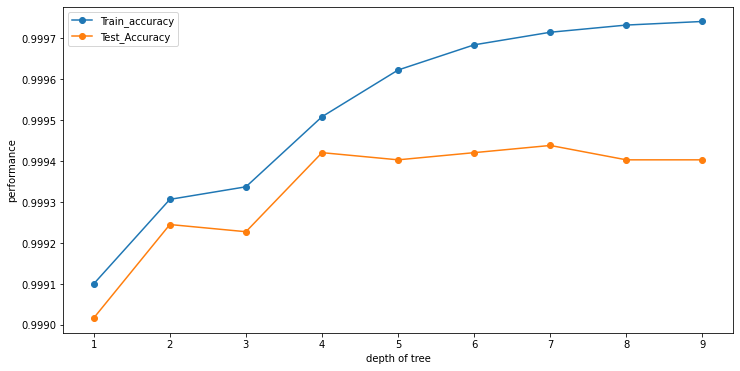

In [166]:
plt.figure(figsize =(12,6))
plt.plot(tree_frame['max_depth'], tree_frame['train_acc'], marker= 'o',label = 'Train_accuracy')
plt.plot(tree_frame['max_depth'], tree_frame['test_acc'], marker='o', label= 'Test_Accuracy')
plt.xlabel('depth of tree')
plt.ylabel('performance')
plt.legend()
plt.show() #graph display betwee the train data and test data. dependent on the relationship, the test tendency would be following up the train data. However, after tree leaf 4, the train data still be going up, test data be going down.

In [167]:
tree1 = DecisionTreeClassifier(max_depth = 4,random_state=1) # Dependent on the above analysis, we try to fix the model to enhance accuracy.

In [168]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [169]:
tree1.score(X_test,y_test)

0.999420666409185

In [170]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

In [171]:
text_representation = tree.export_text(tree1)
print(text_representation)

|--- feature_16 <= -2.70
|   |--- feature_9 <= -1.46
|   |   |--- feature_25 <= -0.23
|   |   |   |--- feature_26 <= 0.92
|   |   |   |   |--- class: 1
|   |   |   |--- feature_26 >  0.92
|   |   |   |   |--- class: 0
|   |   |--- feature_25 >  -0.23
|   |   |   |--- feature_4 <= -22.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  -22.67
|   |   |   |   |--- class: 1
|   |--- feature_9 >  -1.46
|   |   |--- feature_20 <= 0.30
|   |   |   |--- feature_22 <= -3.94
|   |   |   |   |--- class: 1
|   |   |   |--- feature_22 >  -3.94
|   |   |   |   |--- class: 0
|   |   |--- feature_20 >  0.30
|   |   |   |--- feature_13 <= -2.90
|   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  -2.90
|   |   |   |   |--- class: 0
|--- feature_16 >  -2.70
|   |--- feature_13 <= -8.10
|   |   |--- feature_9 <= -2.19
|   |   |   |--- class: 1
|   |   |--- feature_9 >  -2.19
|   |   |   |--- class: 0
|   |--- feature_13 >  -8.10
|   |   |--- feature_13 <= -4.66
|   |   |   |--- featur

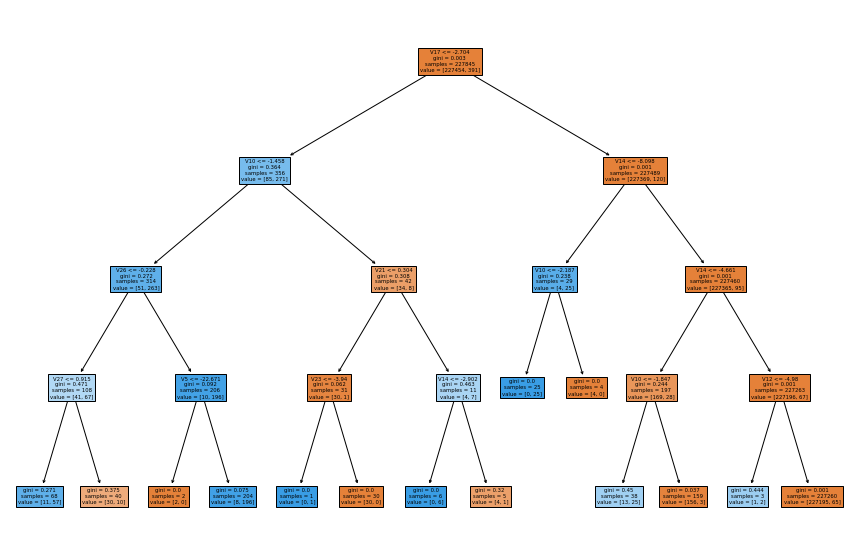

In [175]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree1, 
                   feature_names=X_train.columns,  
                   filled=True) #build up the decision tree to evaluate the credit card